# Get Raw data from www.champsorchump.us

**It could take some time to complete**

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define the NBA teams
nba_teams = [
    'atlanta-hawks', 'boston-celtics', 'brooklyn-nets', 'charlotte-hornets',
    'chicago-bulls', 'cleveland-cavaliers', 'dallas-mavericks', 'denver-nuggets',
    'detroit-pistons', 'golden-state-warriors', 'houston-rockets', 'indiana-pacers',
    'los-angeles-clippers', 'los-angeles-lakers', 'memphis-grizzlies', 'miami-heat',
    'milwaukee-bucks', 'minnesota-timberwolves', 'new-orleans-pelicans', 'new-york-knicks',
    'oklahoma-city-thunder', 'orlando-magic', 'philadelphia-76ers', 'phoenix-suns',
    'portland-trail-blazers', 'sacramento-kings', 'san-antonio-spurs', 'toronto-raptors',
    'utah-jazz', 'washington-wizards'
]

# HTML table rows process
def process_game_row(tr, team):
    date = tr.find('td', class_='text-center').get_text(strip=True)
    opponent_td = tr.find_all('td', class_='text-center')[1]
    opponent_raw = opponent_td.get_text(strip=True)
    score = tr.find_all('td', class_='text-center')[2].get_text(strip=True)
    is_playoff = opponent_td.find('span', class_='fa fa-bolt') is not None
    type = "Playoff" if is_playoff else "Regular"
    win_loss = "Win" if 'W' in score else "Loss"
    team1 = team.replace('-', ' ')
    opponent = opponent_raw.replace('@ ', '').replace('vs ', '').replace('-', ' ')
    
    ot_game = 0  # Default to no OT
    expanding_td = tr.find('td', class_='expanding')
    if expanding_td and 'OT' in expanding_td.text:
        ot_game = 1  # Mark as OT game

    return {
        'Date': date, 'Score': score, 'Win': win_loss, 'Type': type,
        'Team1': team1, 'Team2': opponent, 'OT': ot_game
    }

# Data scrape year
def scrape_data_for_year(team, year):
    headers = {'User-Agent': 'Mozilla/5.0'}
    url = f"https://champsorchumps.us/team/nba/{team}/{year}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        target_div = soup.find('div', class_='col-md-12 col-lg-8')
        if target_div:
            game_rows = target_div.find_all('tr', id=lambda x: x and x.startswith('game_'))
            print(f"Scraping data for {team}. Year {year}.")
            return [process_game_row(tr, team) for tr in game_rows if tr.find('td', class_='text-center')]
    else:
        print(f"Failed to retrieve the web page for year {year}. Status code: {response.status_code}")
        return []

# Data scrape team
def scrape_data_for_team(team, start_year, end_year):
    all_games_data = []
    for year in range(start_year, end_year + 1):
        yearly_data = scrape_data_for_year(team, year)
        all_games_data.extend(yearly_data)
        time.sleep(1)  # Delay
    return pd.DataFrame(all_games_data)

# User promt
team_selection = input("Enter 'all' for all teams or specify a team (e.g., 'los-angeles-clippers'): ").strip().lower().replace(' ', '-')
start_year = int(input("Enter your start year: "))
end_year = int(input("Enter your end year: "))

master_df = pd.DataFrame()

# Handle all
if team_selection == 'all':
    for team in nba_teams:
        df = scrape_data_for_team(team, start_year, end_year)
        master_df = pd.concat([master_df, df], ignore_index=True)
else:
    if team_selection in nba_teams:
        master_df = scrape_data_for_team(team_selection, start_year, end_year)
    else:
        print("Team not found. Please ensure you've entered the team name correctly.")

# Remove rows with an empty 'Score' column
master_df = master_df[master_df['Score'].str.strip() != '']

# Data post-processing
master_df['Win'] = master_df['Win'].apply(lambda x: 1 if x == 'Win' else 0)
master_df['Type'] = master_df['Type'].apply(lambda x: 1 if x == 'Playoff' else 0)

# Show head
print(master_df.head())

# Export to CSV
csv_file_name = f"nba_data_{start_year}_to_{end_year}.csv"
master_df.to_csv(csv_file_name, index=False)
print(f"CSV file generated: {csv_file_name}")

Enter 'all' for all teams or specify a team (e.g., 'los-angeles-clippers'):  all
Enter your start year:  2024
Enter your end year:  2024


Scraping data for atlanta-hawks. Year 2024.
Scraping data for boston-celtics. Year 2024.
Scraping data for brooklyn-nets. Year 2024.
Scraping data for charlotte-hornets. Year 2024.
Scraping data for chicago-bulls. Year 2024.
Scraping data for cleveland-cavaliers. Year 2024.
Scraping data for dallas-mavericks. Year 2024.
Scraping data for denver-nuggets. Year 2024.
Scraping data for detroit-pistons. Year 2024.
Scraping data for golden-state-warriors. Year 2024.
Scraping data for houston-rockets. Year 2024.
Scraping data for indiana-pacers. Year 2024.
Scraping data for los-angeles-clippers. Year 2024.
Scraping data for los-angeles-lakers. Year 2024.
Scraping data for memphis-grizzlies. Year 2024.
Scraping data for miami-heat. Year 2024.
Scraping data for milwaukee-bucks. Year 2024.
Scraping data for minnesota-timberwolves. Year 2024.
Scraping data for new-orleans-pelicans. Year 2024.
Scraping data for new-york-knicks. Year 2024.
Scraping data for oklahoma-city-thunder. Year 2024.
Scrapin

# Adjust the format and add features

In [31]:
import pandas as pd
import numpy as np

# Sample dictionary for mapping team names to their IDs
teams_id = {
    'atlantahawks': 1610612737, 'bostonceltics': 1610612738, 'clevelandcavaliers': 1610612739,
    'neworleanspelicans': 1610612740, 'chicagobulls': 1610612741, 'dallasmavericks': 1610612742,
    'denvernuggets': 1610612743, 'goldenstatewarriors': 1610612744, 'houstonrockets': 1610612745,
    'losangelesclippers': 1610612746, 'losangeleslakers': 1610612747, 'miamiheat': 1610612748,
    'milwaukeebucks': 1610612749, 'minnesotatimberwolves': 1610612750, 'brooklynnets': 1610612751,
    'newyorkknicks': 1610612752, 'orlandomagic': 1610612753, 'indianapacers': 1610612754,
    'philadelphia76ers': 1610612755, 'phoenixsuns': 1610612756, 'portlandtrailblazers': 1610612757,
    'sacramentokings': 1610612758, 'sanantoniospurs': 1610612759, 'oklahomacitythunder': 1610612760,
    'torontoraptors': 1610612761, 'utahjazz': 1610612762, 'memphisgrizzlies': 1610612763,
    'washingtonwizards': 1610612764, 'detroitpistons': 1610612765, 'charlottehornets': 1610612766,
}

# Load the dataset
df = pd.read_csv('nba_data_2024_to_2024.csv')

# Normalize team names function
def normalize_team_name(name):
    name = name.lower().replace(" ", "")
    return teams_id.get(name, "Unknown")

# Normalize 'Team1' and 'Team2' columns to team IDs
df['Team1'] = df['Team1'].apply(normalize_team_name)
df['Team2'] = df['Team2'].apply(lambda x: x.replace('@', '').replace('vs', '').strip()).apply(normalize_team_name)

# Make sure to convert 'Date' into datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Using errors='coerce' to handle any invalid date formats by converting them to NaT

# Now, you can safely extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Extract and process scores
score_pattern = r'(\d{2,3})\s*[-–]\s*(\d{2,3})'
scores = df['Score'].str.extract(score_pattern)
df['Team1_Score'] = scores.iloc[:, 0].astype(float)
df['Team2_Score'] = scores.iloc[:, 1].astype(float)

# Calculate average score for each team
global_avg_scores = pd.concat([
    df.groupby('Team1')['Team1_Score'].mean(),
    df.groupby('Team2')['Team2_Score'].mean()
]).groupby(level=0).mean()

# Calculate win ratio for each team
df['Win'] = (df['Team1_Score'] > df['Team2_Score']).astype(int)
#df['Win'] = df['Team1_Score'] > df['Team2_Score']  # Assuming 'Win' indicates if Team1 won
df['Avg_Win_Ratio'] = df.groupby('Team1')['Win'].transform('mean')

# Calculate the absolute score difference and normalize to a similarity score (0 to 1)
df['Score_Difference'] = abs(df['Team1_Score'] - df['Team2_Score'])
max_diff = df['Score_Difference'].max()
df['Similarity_Score'] = 1 - (df['Score_Difference'] / max_diff)

# Drop unnecessary columns
df.drop(['Score_Difference', 'Score'], axis=1, inplace=True)

# Function to calculate avg_score_diff for each matchup (optional based on your requirements)
def calculate_avg_score_diff(row):
    team1_avg_score = global_avg_scores.get(row['Team1'], 0)
    team2_avg_score = global_avg_scores.get(row['Team2'], 0)
    return team1_avg_score - team2_avg_score if team1_avg_score and team2_avg_score else 0

# Apply the function to each row
df['Avg_Score_Diff'] = df.apply(calculate_avg_score_diff, axis=1)

# Initialize counters for wins and losses
df['Regular_Wins_Team1'] = 0
df['Regular_Losses_Team1'] = 0
df['Playoff_Wins_Team1'] = 0
df['Playoff_Losses_Team1'] = 0

# Iterate through DataFrame to count wins and losses
for index, row in df.iterrows():
    if row['Type'] == 0:  # Regular game
        if row['Win']:
            df.at[index, 'Regular_Wins_Team1'] = 1
        else:
            df.at[index, 'Regular_Losses_Team1'] = 1
    elif row['Type'] == 1:  # Playoff game
        if row['Win']:
            df.at[index, 'Playoff_Wins_Team1'] = 1
        else:
            df.at[index, 'Playoff_Losses_Team1'] = 1

# Group by Team1 and aggregate win/loss counts
agg_functions = {
    'Regular_Wins_Team1': 'sum',
    'Regular_Losses_Team1': 'sum',
    'Playoff_Wins_Team1': 'sum',
    'Playoff_Losses_Team1': 'sum'
}
team_aggregates = df.groupby('Team1').agg(agg_functions).reset_index()

# Merge aggregates back to the original DataFrame
df = pd.merge(df, team_aggregates, on='Team1', suffixes=('', '_total'))

# Drop columns
df = df.drop(['Date', 'Regular_Wins_Team1', 'Regular_Losses_Team1', 'Playoff_Losses_Team1', 'Playoff_Wins_Team1'], axis=1)

# Fill empty values with 0 for the entire DataFrame
df.fillna(0, inplace=True)

# Display the first few rows to verify the calculations
print("Preview of prepared data:")
print(df.head())

# Save the updated DataFrame to a CSV file
save_confirmation = input("Do you want to save the updated data to a CSV file? (yes/no): ").strip().lower()
if save_confirmation == 'yes':
    csv_file_name = input("Enter the name for the CSV file (e.g., 'updated_nba_data.csv'): ").strip()
    df.to_csv(csv_file_name, index=False)
    print(f"Updated data saved to '{csv_file_name}'.")
else:
    print("Data save cancelled.")

Preview of prepared data:
   Win  Type       Team1       Team2  OT  Year  Month  Day  Team1_Score  \
0    0     0  1610612737  1610612766   0  2023     10   25        110.0   
1    0     0  1610612737  1610612752   0  2023     10   27        120.0   
2    1     0  1610612737  1610612749   0  2023     10   29        127.0   
3    1     0  1610612737  1610612750   0  2023     10   30        127.0   
4    1     0  1610612737  1610612764   0  2023     11    1        130.0   

   Team2_Score  Avg_Win_Ratio  Similarity_Score  Avg_Score_Diff  \
0        116.0       0.442308          0.903226       13.438160   
1        126.0       0.442308          0.903226        6.596154   
2        110.0       0.442308          0.725806       -1.251814   
3        113.0       0.442308          0.774194        8.230769   
4        121.0       0.442308          0.854839        6.849925   

   Regular_Wins_Team1_total  Regular_Losses_Team1_total  \
0                        23                          29   
1 

Do you want to save the updated data to a CSV file? (yes/no):  yes
Enter the name for the CSV file (e.g., 'updated_nba_data.csv'):  last2024.csv


Updated data saved to 'last2024.csv'.


# Train the model

**It could take some time to complete**

Adjust one-hot encode categorical features and hyperparameters for prediction improvement 

Fitting 8 folds for each of 729 candidates, totalling 5832 fits
Test Metrics:
Accuracy: 0.6129802474495333
ROC AUC: 0.6603771664720476
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      2299
           1       0.62      0.60      0.61      2308

    accuracy                           0.61      4607
   macro avg       0.61      0.61      0.61      4607
weighted avg       0.61      0.61      0.61      4607



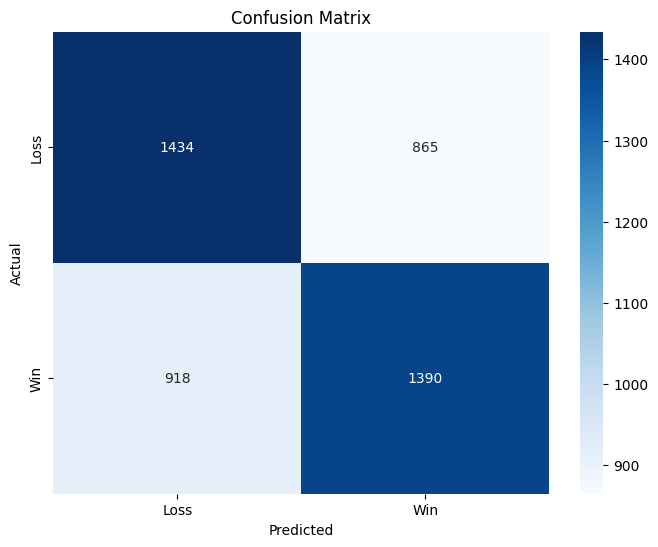

Prediction vs Actual for the Last Set of Games:
    Actual  Predicted
0        0          1
1        0          1
2        0          0
3        0          0
4        0          1
..     ...        ...
95       0          0
96       0          0
97       0          0
98       1          0
99       0          1

[100 rows x 2 columns]
Accuracy for the Last Set of Games: 0.63


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('last.csv')
# 'Team1_Score', and 'Team2_Score' columns are dropped for model training
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize XGBoost model and perform Grid Search for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=8, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and encoder
pickle.dump(best_model, open("LASTxgboost_trained_model.pkl", 'wb'))
pickle.dump(encoder, open("LASTencoder.pkl", 'wb'))


# TEST

# Extracting the last set of games for prediction
last_games = data.tail(100).reset_index(drop=True)

# Preparing features for the last set of games
X_last = last_games.drop(['Win'], axis=1)
y_last_actual = last_games['Win'].values

# One-hot encoding for the last set of games
X_last_categorical = encoder.transform(X_last[categorical_features])
X_last_encoded = pd.DataFrame(X_last_categorical, columns=feature_names)
X_last_final = pd.concat([X_last.drop(categorical_features, axis=1), X_last_encoded], axis=1)

# Making predictions for the last set of games
y_last_pred = best_model.predict(X_last_final)

# Comparing actual outcomes with predictions
comparison = pd.DataFrame({'Actual': y_last_actual, 'Predicted': y_last_pred})
print("Prediction vs Actual for the Last Set of Games:")
print(comparison)

# Calculate and print accuracy for the last set of games
accuracy_last = accuracy_score(y_last_actual, y_last_pred)
print(f"Accuracy for the Last Set of Games: {accuracy_last}")
